In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import pickle

from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor

In [3]:
DEVICE = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

# 1. Data

In [7]:
root_dir = "./data/MNIST/"
train_dataset = MNIST(root=root_dir, train=True, download=True, transform=ToTensor())
test_dataset = MNIST(root=root_dir, train=False, download=True, transform=ToTensor())

In [8]:
# plt.imshow((train_dataset.data[0] / 255 >= 0.5).numpy().astype(np.uint8), cmap="gray")
# plt.colorbar()

In [9]:
train_dataset.data.shape, test_dataset.data.shape

(torch.Size([60000, 28, 28]), torch.Size([10000, 28, 28]))

In [10]:
# BATCH_SIZE = 128
# train_loader = DataLoader((train_dataset.data / 255. > 0.5).numpy().astype(np.uint8), batch_size=BATCH_SIZE, shuffle=True)
# test_loader = DataLoader((test_dataset.data / 255. > 0.5).numpy().astype(np.uint8), batch_size=BATCH_SIZE, shuffle=False)
BATCH_SIZE = 128
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

In [11]:
for img_tensor, labels in train_loader:
    print(f"{img_tensor.shape}, {labels.shape}")
    break

torch.Size([128, 1, 28, 28]), torch.Size([128])


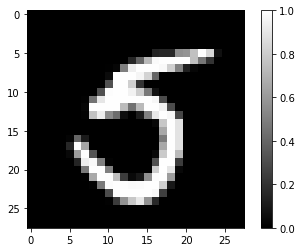

In [12]:
plt.imshow(img_tensor[0, 0], cmap="gray")
plt.colorbar()

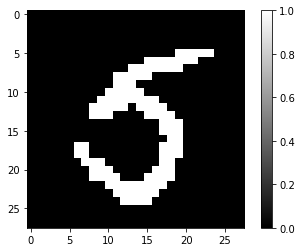

In [13]:
plt.imshow(img_tensor[0, 0] > 0.5, cmap="gray")
plt.colorbar()

# 2. Model and Training

In [14]:
# best lr
from models.MADE import MADE
from helpers.datasets import MNISTForMADE
from helpers.train_eval import lr_search

In [15]:
class WrapperMADE(MADE):
    def __init__(self, **kwargs):
        super(WrapperMADE, self).__init__(**kwargs)
    
    def forward(self, x):
        batch_size = x.shape[0]
        flattened = super().forward(x)
        return flattened.reshape(batch_size, -1, *self.orginal_shape).contiguous()

In [16]:
mnist_for_made = MNISTForMADE(train_dataset.data)
lr_train_loader = DataLoader(mnist_for_made, batch_size=BATCH_SIZE, shuffle=True)

In [19]:
made_params = dict(in_shape=(1, 28, 28), out_num_comp=2, hidden_sizes=[512, 512, 512])
wrapper_made = WrapperMADE(**made_params).to(DEVICE)
optimizer = torch.optim.Adam(wrapper_made.parameters(), lr=1e-6)

  0%|          | 0/100 [00:00<?, ?it/s]

Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 5.69E-03


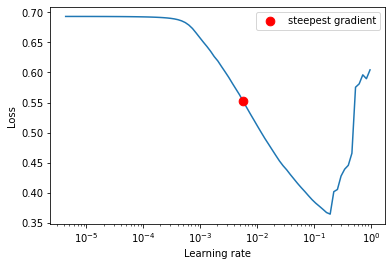

In [20]:
lr_history = lr_search(wrapper_made, nn.CrossEntropyLoss(), optimizer, lr_train_loader, 
                       end_lr=2, device=torch.device("cuda"))

In [21]:
lr = 5.69e-3

In [22]:
from helpers.train_eval import MADETrainer

In [23]:
made_params["in_shape"] = (28, 28)
made = MADE(**made_params).to(DEVICE)
optimizer = torch.optim.Adam(made.parameters(), lr=lr)
made_trainer = MADETrainer(made, train_loader, test_loader, optimizer)

epoch 1/20:   0%|          | 0/20 [00:00<?, ?it/s]

batch training:   0%|          | 0/469 [00:00<?, ?it/s]

batch eval:   0%|          | 0/79 [00:00<?, ?it/s]

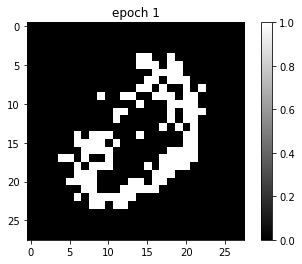

batch training:   0%|          | 0/469 [00:00<?, ?it/s]

batch eval:   0%|          | 0/79 [00:00<?, ?it/s]

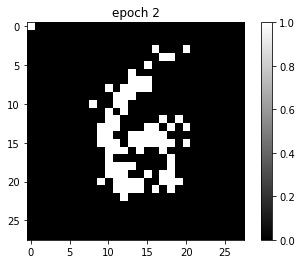

batch training:   0%|          | 0/469 [00:00<?, ?it/s]

batch eval:   0%|          | 0/79 [00:00<?, ?it/s]

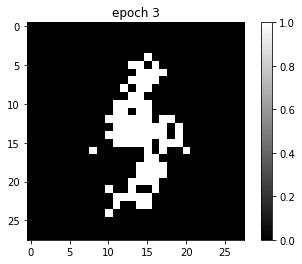

batch training:   0%|          | 0/469 [00:00<?, ?it/s]

batch eval:   0%|          | 0/79 [00:00<?, ?it/s]

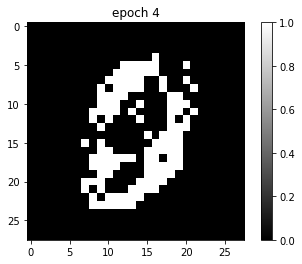

batch training:   0%|          | 0/469 [00:00<?, ?it/s]

batch eval:   0%|          | 0/79 [00:00<?, ?it/s]

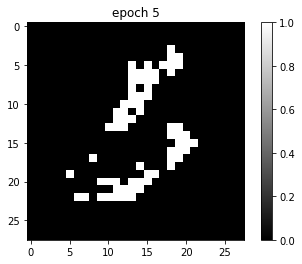

batch training:   0%|          | 0/469 [00:00<?, ?it/s]

batch eval:   0%|          | 0/79 [00:00<?, ?it/s]

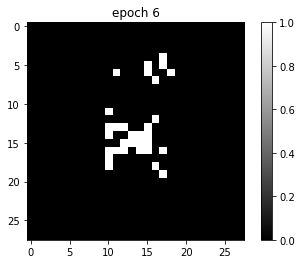

batch training:   0%|          | 0/469 [00:00<?, ?it/s]

batch eval:   0%|          | 0/79 [00:00<?, ?it/s]

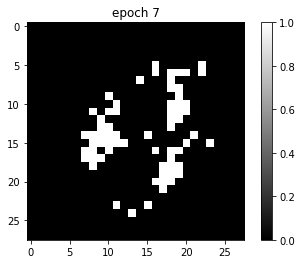

batch training:   0%|          | 0/469 [00:00<?, ?it/s]

batch eval:   0%|          | 0/79 [00:00<?, ?it/s]

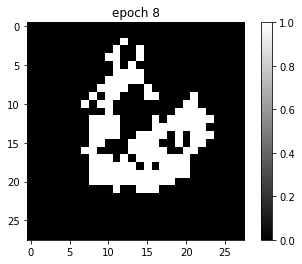

batch training:   0%|          | 0/469 [00:00<?, ?it/s]

batch eval:   0%|          | 0/79 [00:00<?, ?it/s]

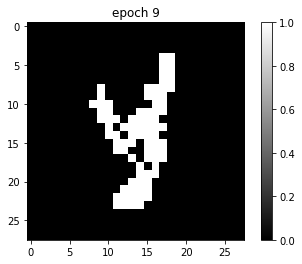

batch training:   0%|          | 0/469 [00:00<?, ?it/s]

batch eval:   0%|          | 0/79 [00:00<?, ?it/s]

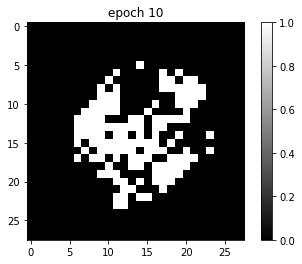

batch training:   0%|          | 0/469 [00:00<?, ?it/s]

batch eval:   0%|          | 0/79 [00:00<?, ?it/s]

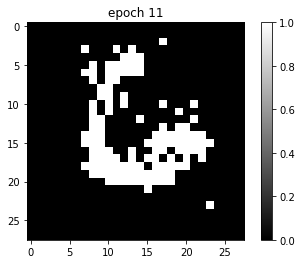

batch training:   0%|          | 0/469 [00:00<?, ?it/s]

batch eval:   0%|          | 0/79 [00:00<?, ?it/s]

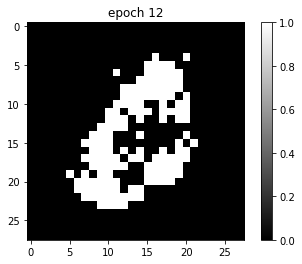

batch training:   0%|          | 0/469 [00:00<?, ?it/s]

batch eval:   0%|          | 0/79 [00:00<?, ?it/s]

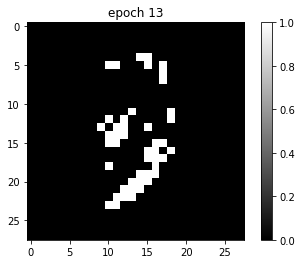

batch training:   0%|          | 0/469 [00:00<?, ?it/s]

batch eval:   0%|          | 0/79 [00:00<?, ?it/s]

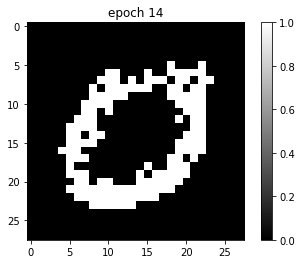

batch training:   0%|          | 0/469 [00:00<?, ?it/s]

batch eval:   0%|          | 0/79 [00:00<?, ?it/s]

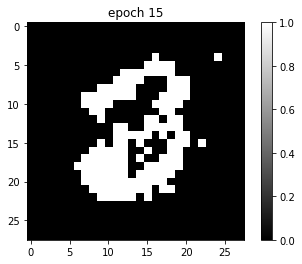

batch training:   0%|          | 0/469 [00:00<?, ?it/s]

batch eval:   0%|          | 0/79 [00:00<?, ?it/s]

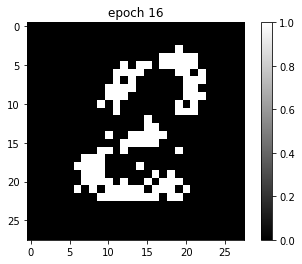

batch training:   0%|          | 0/469 [00:00<?, ?it/s]

batch eval:   0%|          | 0/79 [00:00<?, ?it/s]

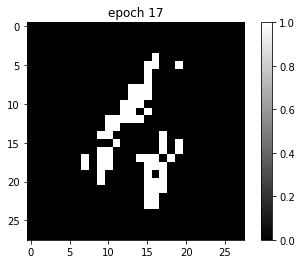

batch training:   0%|          | 0/469 [00:00<?, ?it/s]

batch eval:   0%|          | 0/79 [00:00<?, ?it/s]

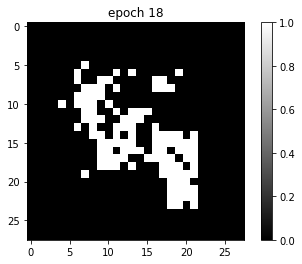

batch training:   0%|          | 0/469 [00:00<?, ?it/s]

batch eval:   0%|          | 0/79 [00:00<?, ?it/s]

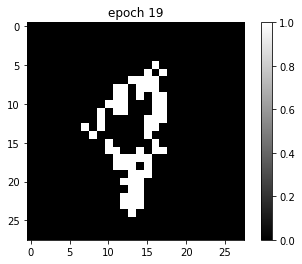

batch training:   0%|          | 0/469 [00:00<?, ?it/s]

batch eval:   0%|          | 0/79 [00:00<?, ?it/s]

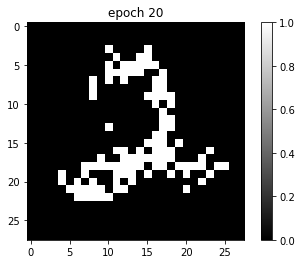

In [24]:
train_losses, eval_losses = made_trainer.train(if_plot=True)

# 3. Evaluation and Sampling

In [25]:
tr_history_path = "./params/made_mnist/1636493119_4306283/training.pkl"
model_path = "./params/made_mnist/1636493119_4306283/epoch_19_eval_loss_0_1303.pt"

In [26]:
with open(tr_history_path, "wb") as wf:
    pickle.dump([train_losses, eval_losses], wf)

In [29]:
made_params = dict(in_shape=(28, 28), out_num_comp=2, hidden_sizes=[512, 512, 512])
made_reload = MADE(**made_params).to(DEVICE)

In [30]:
made_reload.load_state_dict(torch.load(model_path))
made_reload.eval()
print(end="")

In [31]:
with open(tr_history_path, "rb") as rf:
    train_losses, eval_losses = pickle.load(rf)

In [32]:
from helpers.utils import plot_training_history, MADE_sample_plot

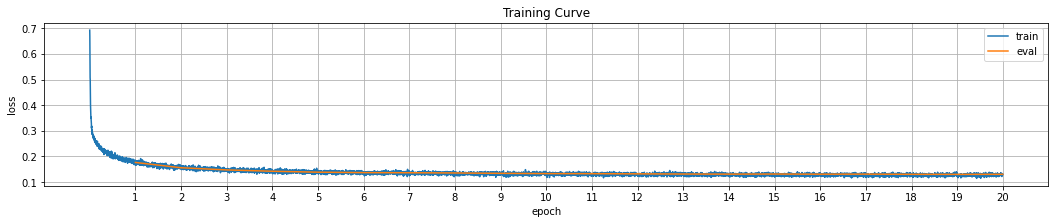

In [33]:
plot_training_history(train_losses, eval_losses, figsize=(18, 3))

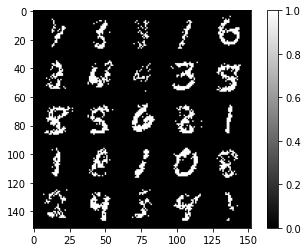

In [34]:
MADE_sample_plot(made_reload)